<a href="https://colab.research.google.com/github/Divyaanshvats/FIDROX_ASSIGNMENTS/blob/main/FIDROX_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AccessAI: Detecting Anomalous Swipe Behavior in Physical Access Control Systems**

# **IMPORT ALL THE REQUIRE LIBRARIES**

In [33]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import os
# Seed for reproducibility
np.random.seed(42)
random.seed(42)
NUM_DAYS = 30
SWIPES_PER_DAY = 1000
TOTAL_RECORDS = NUM_DAYS * SWIPES_PER_DAY
user_ids = [f"U{str(i).zfill(3)}" for i in range(1, 101)]
doors = {
    "D01": "Main Entrance",
    "D02": "East Wing",
    "D03": "Server Room",# restricted
    "D04": "HR Department",
    "D05": "Rooftop Access",# rarely used
    "D06": "Finance Room",
    "D07": "Cafeteria",
    "D08": "Basement Storage",# rarely used
}

# RANDOM GENERATION OF DATASET

In [34]:
data = []
start_date = datetime(2025, 5, 1)
for i in range(TOTAL_RECORDS):
    current_date = start_date + timedelta(days=i // SWIPES_PER_DAY)
    if np.random.rand() < 0.8:
        hour = np.random.randint(8, 19)  #Office hours
    else:
        hour = np.random.choice([0, 1, 2, 3, 4, 22, 23])  # Odd hours

    minute = np.random.randint(0, 60)
    second = np.random.randint(0, 60)
    timestamp = current_date.replace(hour=hour, minute=minute, second=second)
    user = random.choice(user_ids)
    door = random.choices(list(doors.keys()), weights=[25, 20, 5, 15, 2, 10, 20, 3])[0]
    direction = random.choice(["IN", "OUT"])
    result = "Success" if np.random.rand() > 0.05 else "Failed"
    # Anomalies are defined in the following way:
    if np.random.rand() < 0.01:
        for _ in range(5):
            anomaly_timestamp = timestamp + timedelta(seconds=random.randint(1, 30))
            data.append([anomaly_timestamp, user, door, doors[door], direction, "Failed"])

    data.append([timestamp, user, door, doors[door], direction, result])
df = pd.DataFrame(data, columns=["Timestamp", "UserID", "DoorID", "DoorName", "Direction", "Result"])
df.head()

,Timestamp,UserID,DoorID,DoorName,Direction,Result
0,2025-05-01 18:07:20,U082,D01,Main Entrance,OUT,Success
1,2025-05-01 15:52:35,U032,D01,Main Entrance,IN,Success
2,2025-05-01 15:43:29,U087,D06,Finance Room,IN,Success
3,2025-05-01 17:21:43,U076,D02,East Wing,IN,Failed
4,2025-05-01 10:43:54,U012,D01,Main Entrance,IN,Success


In [35]:
output_path = "/mnt/data/AccessAI_Simulated_Swipe_Logs.csv"
output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df.to_csv(output_path, index=False)
output_path

'/mnt/data/AccessAI_Simulated_Swipe_Logs.csv'

# **DATA ANALYSIS(Basic Analysis)**

In [74]:
df = pd.read_csv("/mnt/data/AccessAI_Simulated_Swipe_Logs.csv")
df.head(6)

,Timestamp,UserID,DoorID,DoorName,Direction,Result
0,2025-05-01 18:07:20,U082,D01,Main Entrance,OUT,Success
1,2025-05-01 15:52:35,U032,D01,Main Entrance,IN,Success
2,2025-05-01 15:43:29,U087,D06,Finance Room,IN,Success
3,2025-05-01 17:21:43,U076,D02,East Wing,IN,Failed
4,2025-05-01 10:43:54,U012,D01,Main Entrance,IN,Success
5,2025-05-01 23:20:08,U072,D01,Main Entrance,OUT,Success


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31505 entries, 0 to 31504
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  31505 non-null  object
 1   UserID     31505 non-null  object
 2   DoorID     31505 non-null  object
 3   DoorName   31505 non-null  object
 4   Direction  31505 non-null  object
 5   Result     31505 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [76]:
df.isnull().sum()

,0
Timestamp,0
UserID,0
DoorID,0
DoorName,0
Direction,0
Result,0


In [77]:
df['UserID'].value_counts().head()

,count
UserID,
U089,411
U017,373
U001,359
U054,352
U018,348


In [78]:
df['DoorName'].value_counts()

,count
DoorName,
Main Entrance,7837
Cafeteria,6296
East Wing,6286
HR Department,4778
Finance Room,3200
Server Room,1567
Basement Storage,896
Rooftop Access,645


In [79]:
df['Direction'].value_counts()

,count
Direction,
IN,15786
OUT,15719


In [80]:
df['Result'].value_counts()

,count
Result,
Success,28478
Failed,3027


# **Time-based Analysis of the Dataset (Visualization also done)**

In [81]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

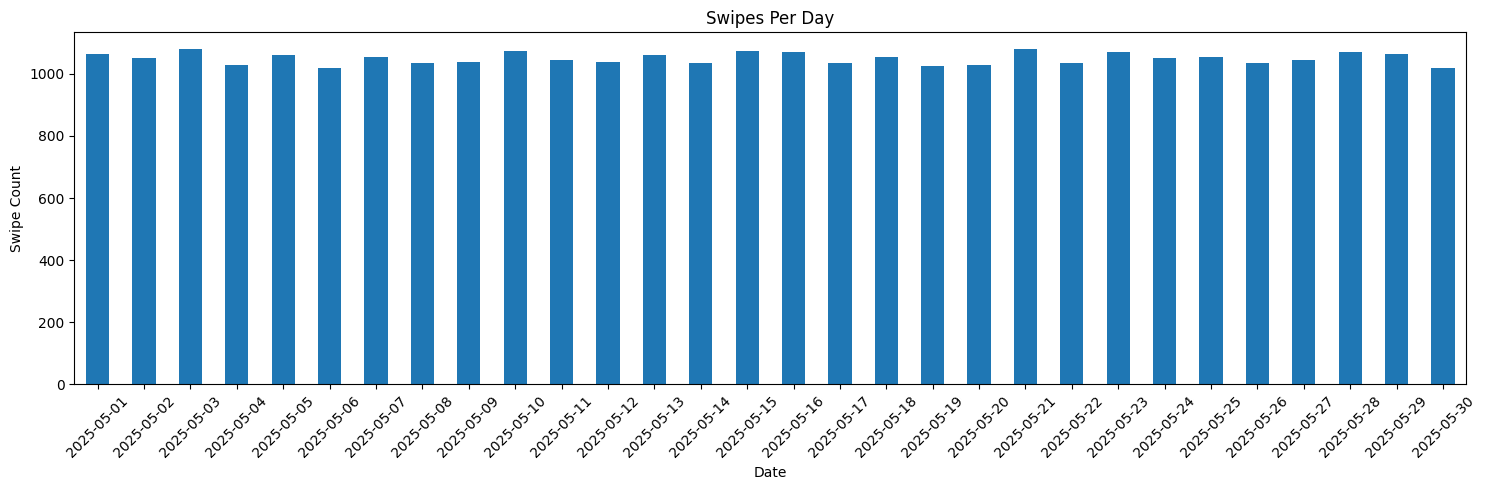

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
df['Date'].value_counts().sort_index().plot(kind='bar')
plt.title("Swipes Per Day")
plt.xlabel("Date")
plt.ylabel("Swipe Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-83-5f0390e697ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='coolwarm')


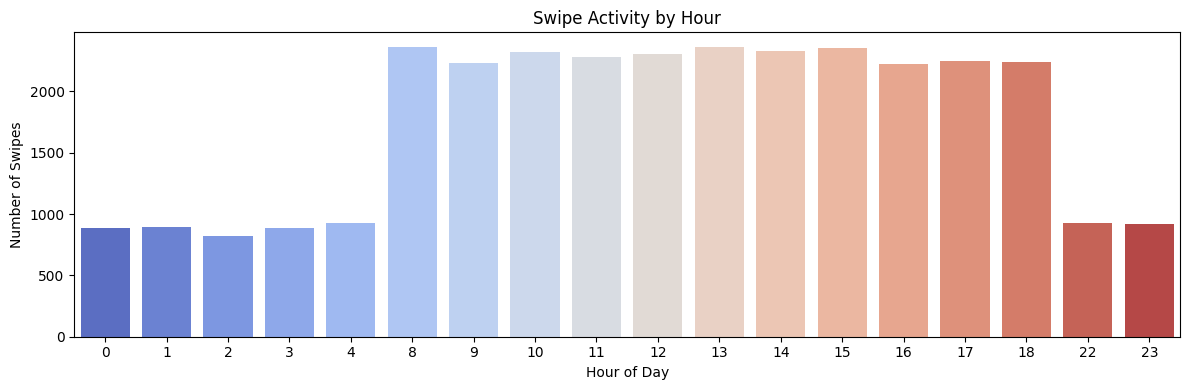

In [83]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Hour', palette='coolwarm')
plt.title("Swipe Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Swipes")
plt.tight_layout()
plt.show()

# **Access Failures & Anomalies**

In [84]:
failure_rate = df['Result'].value_counts(normalize=True)['Failed']
failures_by_door = df[df['Result'] == 'Failed']['DoorName'].value_counts()
failures_by_hour = df[df['Result'] == 'Failed']['Hour'].value_counts().sort_index()

In [85]:
failure_rate

np.float64(0.09607998730360261)

In [86]:
failures_by_door

,count
DoorName,
Main Entrance,755
East Wing,650
Cafeteria,601
HR Department,459
Finance Room,316
Server Room,126
Basement Storage,75
Rooftop Access,45


In [87]:
failures_by_hour

,count
Hour,
0,78
1,95
2,75
3,65
4,86
8,243
9,193
10,241
11,213


# **User Activity Patterns**

<Axes: title={'center': 'Top 10 Active Users'}, ylabel='UserID'>

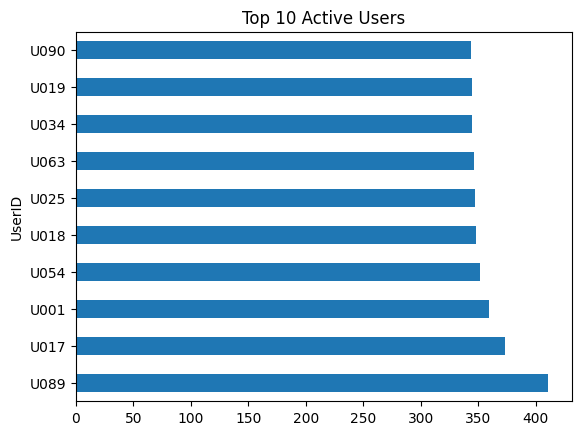

In [88]:
df['UserID'].value_counts().head(10).plot(kind='barh', title='Top 10 Active Users')

In [89]:
df[df['Result'] == 'Failed']['UserID'].value_counts().head(10)

,count
UserID,
U089,68
U094,53
U017,52
U036,50
U037,49
U047,49
U071,46
U025,45
U072,44


<ipython-input-90-af32af824ac6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Result', palette='Set2')


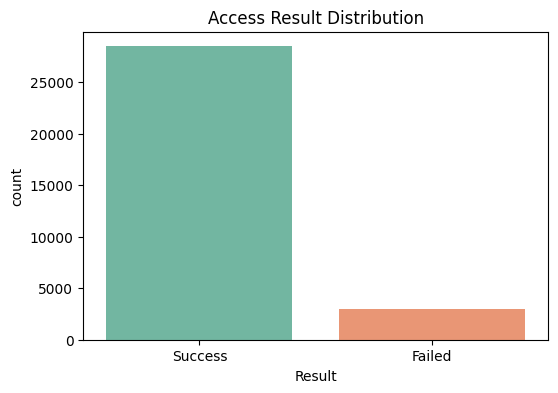

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Result', palette='Set2')
plt.title("Access Result Distribution")
plt.show()

<ipython-input-91-01fd15d825a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failures_by_door.index, y=failures_by_door.values, palette='mako')


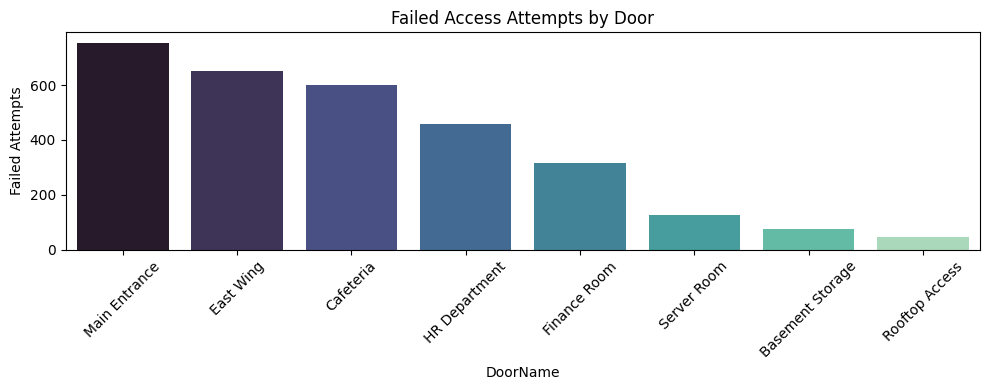

In [91]:
plt.figure(figsize=(10, 4))
failures_by_door = df[df['Result'] == 'Failed']['DoorName'].value_counts()
sns.barplot(x=failures_by_door.index, y=failures_by_door.values, palette='mako')
plt.title("Failed Access Attempts by Door")
plt.ylabel("Failed Attempts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-92-7c9cada0203a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')


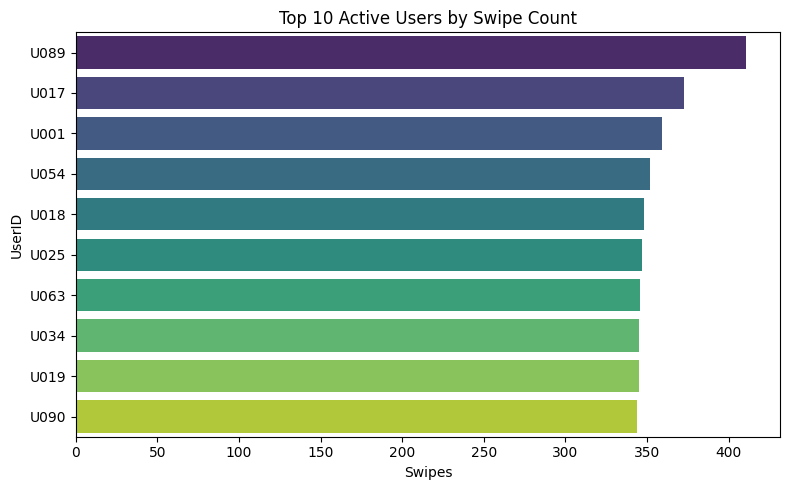

In [92]:
plt.figure(figsize=(8, 5))
top_users = df['UserID'].value_counts().head(10)
sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')
plt.title("Top 10 Active Users by Swipe Count")
plt.xlabel("Swipes")
plt.ylabel("UserID")
plt.tight_layout()
plt.show()

# **PRE PROCESSING AND FEATURE ENGINEERING**

In [93]:
df['DirectionCode'] = df['Direction'].map({'IN': 0, 'OUT': 1})
df['ResultCode'] = df['Result'].map({'Success': 0, 'Failed': 1})
df['DoorCode'] = df['DoorID'].astype('category').cat.codes
df['UserCode'] = df['UserID'].astype('category').cat.codes
features = df[['Hour', 'DirectionCode', 'ResultCode', 'DoorCode', 'UserCode']]

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# **NOW WE APPLY DBSCAN TECHNIQUE**

In [95]:
restricted_doors = ['D03', 'D05', 'D08']
rare_restricted_anomalies = df[df['DoorID'].isin(restricted_doors)]
print(f"Anomalies for rarely used or restricted doors: {len(rare_restricted_anomalies)}")

Anomalies for rarely used or restricted doors: 3108


In [96]:
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
odd_hours = [0, 1, 2, 3, 4, 22, 23]
odd_hour_anomalies = df[df['Hour'].isin(odd_hours)]
print(f"Anomalies for odd hours: {len(odd_hour_anomalies)}")

Anomalies for odd hours: 6261


In [63]:
failed_swipes = df[df['Result'] == 'Failed']
failed_by_user = failed_swipes.groupby('UserID').size()
high_failure_threshold = 5
high_failure_anomalies = failed_by_user[failed_by_user > high_failure_threshold]
print(f"Users with high failed attempts: {len(high_failure_anomalies)}")

Users with high failed attempts: 100


In [97]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_sorted = df.sort_values(['UserID', 'DoorID', 'Timestamp'])
df_sorted['TimeDiff'] = df_sorted.groupby(['UserID', 'DoorID'])['Timestamp'].diff().dt.total_seconds()
rapid_swipes = df_sorted[(df_sorted['TimeDiff'].notnull()) & (df_sorted['TimeDiff'] <= 30)]
print(f"Rapid sequential swipe anomalies: {len(rapid_swipes)}")

Rapid sequential swipe anomalies: 1541


In [72]:
# Add features needed for DBSCAN
df['IsRestrictedDoor'] = df['DoorID'].isin(['D03', 'D05', 'D08']).astype(int)
df['IsOddHour'] = df['Hour'].isin([0, 1, 2, 3, 4, 22, 23]).astype(int)
df['IsFailed'] = (df['Result'] == 'Failed').astype(int)
df_sorted = df.sort_values(['UserID', 'DoorID', 'Timestamp']) # Re-sort just in case
df_sorted['TimeDiff'] = df_sorted.groupby(['UserID', 'DoorID'])['Timestamp'].diff().dt.total_seconds().fillna(9999)
numeric_features = df[['IsRestrictedDoor', 'IsOddHour', 'IsFailed', 'Hour']].copy()#Here we are basically defining the numeric columns
numeric_features['TimeDiff'] = df_sorted.set_index(df.index)['TimeDiff']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Label'] = dbscan_labels
anomalies_dbscan = df[df['DBSCAN_Label'] == -1]
print(f"DBSCAN anomalies found: {len(anomalies_dbscan)}")
rapid_swipe_anomaly_ids = rapid_swipes.index
odd_hour_anomaly_ids = odd_hour_anomalies.index
dbscan_anomaly_ids = anomalies_dbscan.index
print(f"DBSCAN overlap with rapid swipes: {len(set(dbscan_anomaly_ids) & set(rapid_swipe_anomaly_ids))}")
print(f"DBSCAN overlap with odd hours: {len(set(dbscan_anomaly_ids) & set(odd_hour_anomaly_ids))}")

DBSCAN anomalies found: 104
DBSCAN overlap with rapid swipes: 12
DBSCAN overlap with odd hours: 53


In [68]:
df['IsRestrictedDoor'] = df['DoorID'].isin(['D03', 'D05', 'D08']).astype(int)
df['IsOddHour'] = df['Hour'].isin([0, 1, 2, 3, 4, 22, 23]).astype(int)
df['IsFailed'] = (df['Result'] == 'Failed').astype(int)
df_sorted['TimeDiff'] = df_sorted.groupby(['UserID', 'DoorID'])['Timestamp'].diff().dt.total_seconds().fillna(9999)
numeric_features = df[['IsRestrictedDoor', 'IsOddHour', 'IsFailed', 'Hour']].copy()
numeric_features['TimeDiff'] = df_sorted['TimeDiff']
z_scores = np.abs((numeric_features - numeric_features.mean()) / numeric_features.std())
z_anomalies = (z_scores > 2).any(axis=1)
print(f"Improved Z-score anomalies: {z_anomalies.sum()}")

Improved Z-score anomalies: 11126


In [69]:
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1
iqr_mask = (numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR))
iqr_anomalies = iqr_mask.any(axis=1)
print(f"Improved IQR anomalies: {iqr_anomalies.sum()}")

Improved IQR anomalies: 11617


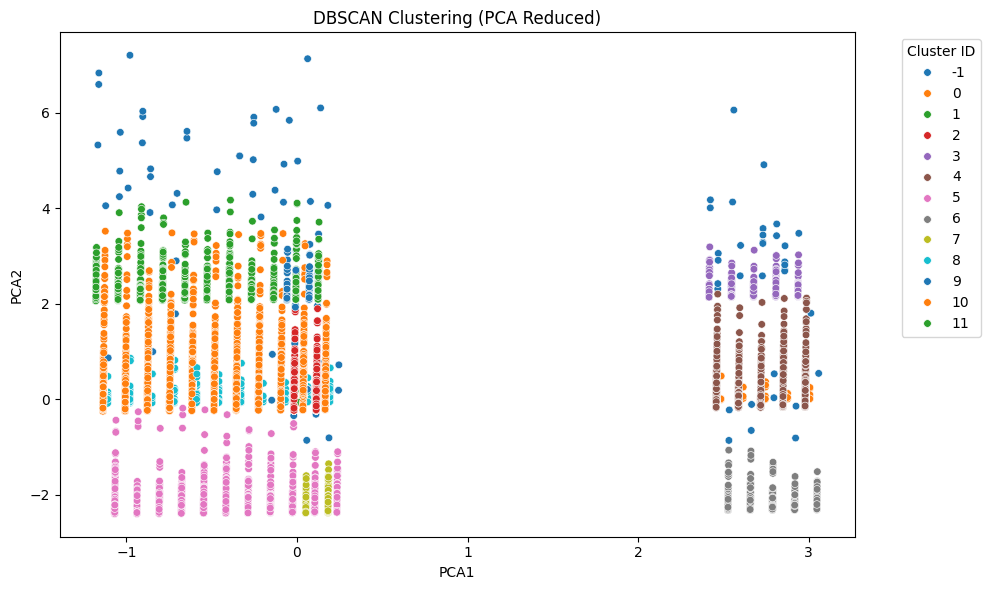

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Label', palette='tab10', legend='full', s=30)
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.legend(title="Cluster ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()